This notebook is a port from tensorflow to pytorch for Chris Dyer's repository on SEAMLS2019 [here](https://github.com/redpony/seaml_intro_nns/blob/master/01_xor_using_tf2.ipynb). Might also benefit those who wanted to learn deep learning with pytorch instead of tensorflow or maybe participants who had hard time to follow on tensorflow.

In [53]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

# Some XOR Data

In [71]:
X = torch.from_numpy(
    np.array([[-1., -1.],
              [-1., 1.],
              [1., -1.],
              [1., 1.]])
    )

y =torch.from_numpy(
    np.array([[-1.],
              [1.],
              [1.],
              [-1.]])
    )
ETA = 0.15  # learning rate for SGD
EPOCHS = 35

# MLP Code

1. Specify W, a, V variables and tell pytorch that it needs to be computed for gradient using `requires_grad=True`.
2. You can tell pytorch to compute gradient by specifying `loss.backward()` then get the gradients on variable
3. Reset gradient data by using `.zero_()` 

In [72]:
HIDDEN = 32
W = Variable(
    torch.from_numpy(
        np.random.normal(size=(2, HIDDEN)) / np.sqrt(HIDDEN)
    ),
    requires_grad=True
)


a = Variable(
    torch.from_numpy(
        np.zeros(shape=(HIDDEN, ))
    ),
    requires_grad=True
)


V = Variable(
    torch.from_numpy(
        np.random.normal(size=(HIDDEN, 1)) / np.sqrt(HIDDEN)
    ),
    requires_grad=True
)

mlp_losses = []
             

In [73]:
for _ in range(EPOCHS):
    # @ operator is matrix multiplication operator
    # in numpy, tensorflow, and pytorch
    p = X @ W + a
    h = torch.relu(p)
    y_pred = h @ V
    loss = 0.5 * (y_pred - y).pow(2).sum()
    
    # collect losses
    mlp_losses.append(loss)
    
    loss.backward()
    
    # IMO these are simpler than tensorflow
    # since these extracting variables with their gradients
    # uses python operator instead of function in tensorflow
    W.data -= ETA * W.grad.data
    a.data -= ETA * a.grad.data
    V.data -= ETA * V.grad.data
    
    W.grad.data.zero_()
    a.grad.data.zero_()
    V.grad.data.zero_()

predictions after training:
[[-1.        ]
 [ 1.        ]
 [ 1.        ]
 [-0.99999999]]


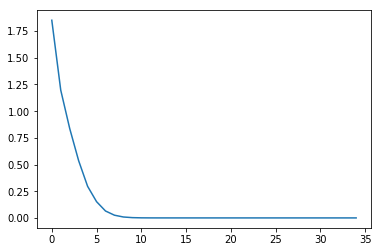

In [76]:
print('predictions after training:\n{}'.format(y_pred.detach().numpy()))
plt.plot(mlp_losses)
plt.show()